# Page View Time Series Visualizer

This is the boilerplate for the Page View Time Series Visualizer project. Instructions for building your project can be found at https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

In [4]:
 # import librarie
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

 # Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [5]:
df=pd.read_csv("/content/fcc-forum-pageviews.csv")

In [6]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [8]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [9]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [10]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)


# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [11]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
(df['value'] <= df['value'].quantile(0.975))]
#still needs cleaning?!


# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

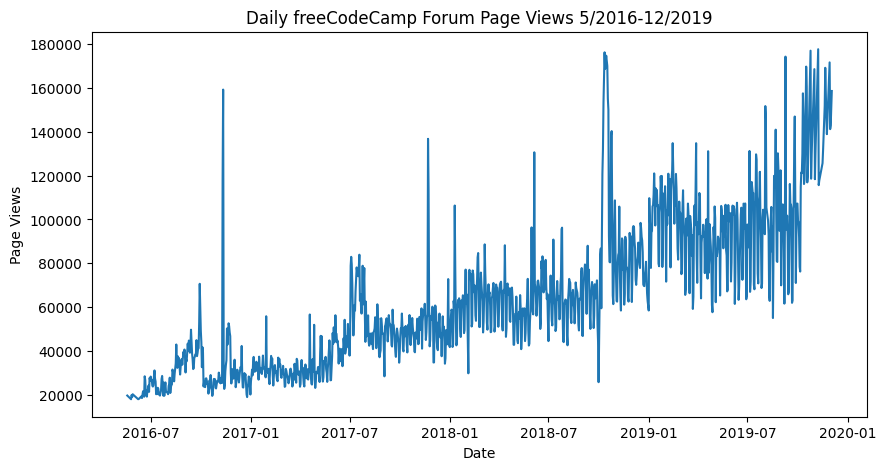

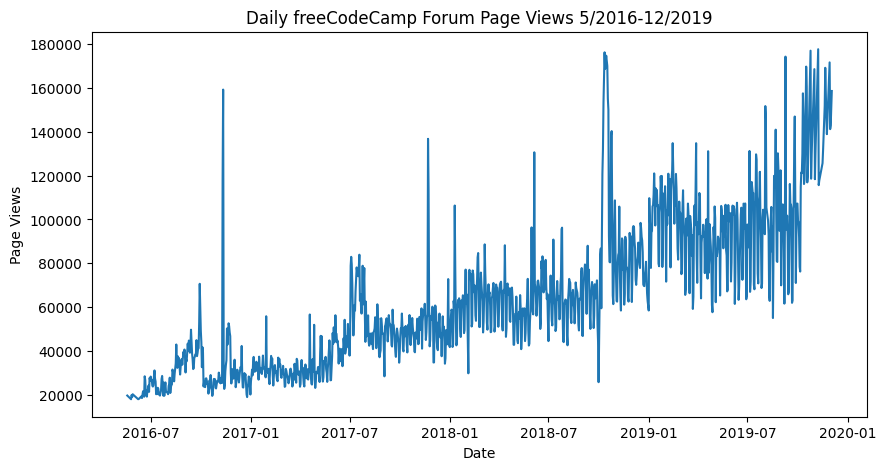

In [17]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(df.index, df['value'])
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

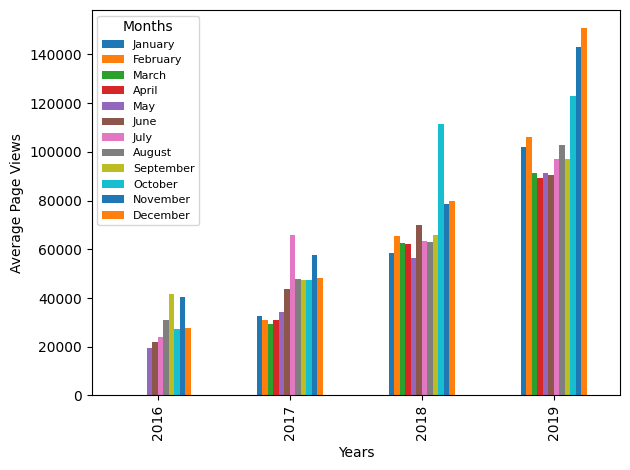

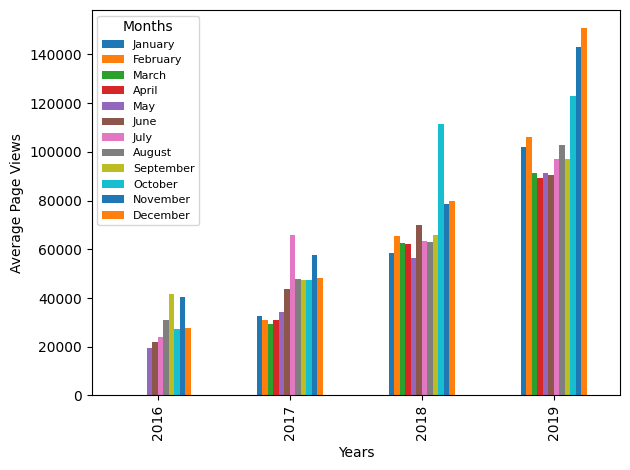

In [15]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot
    # Month names for plotting legend
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig = df_bar.plot.bar()
    fig.legend(months, title='Months', prop={'size': 8})
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.tight_layout()
    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

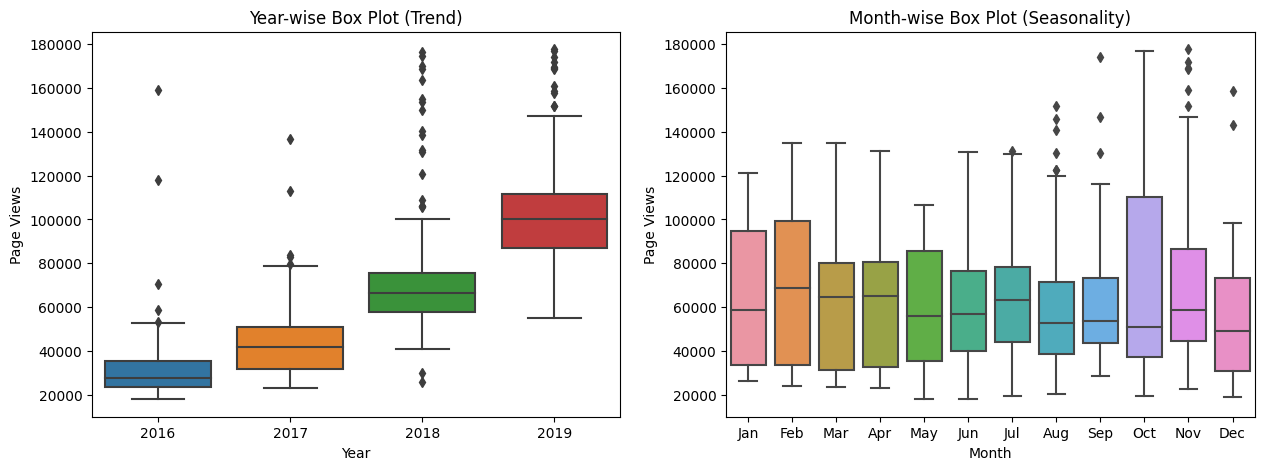

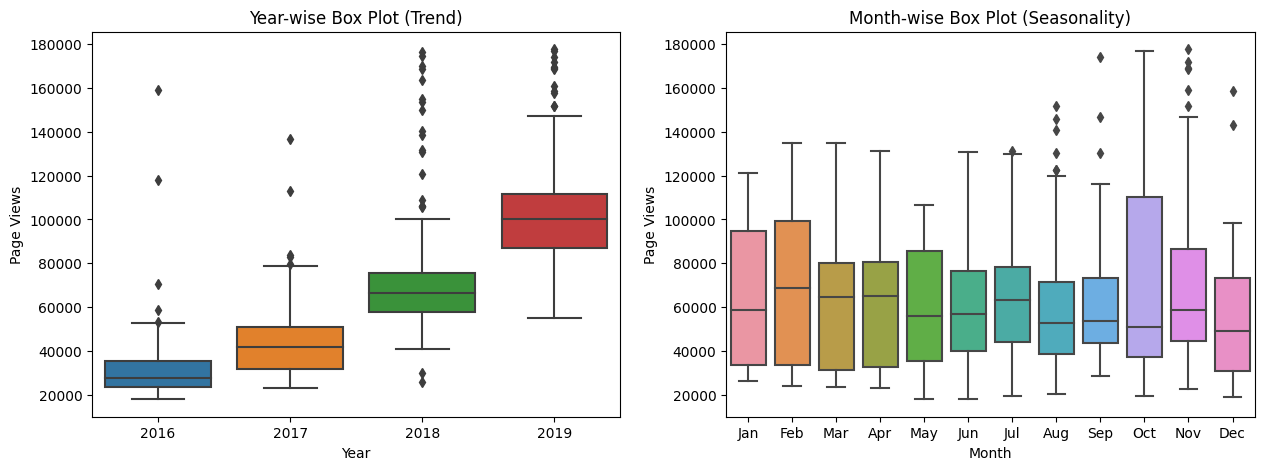

In [16]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['monum'] = df_box['date'].dt.month
    df_box = df_box.sort_values('monum')

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(ncols=2, figsize=(15,5))

    sns.boxplot(ax=ax[0], x='year', y='value', data=df_box).set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(ax=ax[1], x='month', y='value', data=df_box ).set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()